# Practical Task 2

In [166]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [167]:
# Import the diabetes_updated data
diabetes_df = pd.read_csv("diabetes_updated.csv")
diabetes_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [168]:
# Summary diabetes datafrme
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## What Data we have?
```
1. Pregnancies: [Integer][Categorical] indicates the number of pregnancies
2. Glucose: [Integer][Continuous] indicates the plasma glucose concentration
3. Blood Pressure: [Integer][Continuous] indicates diastolic blood pressure in mm/Hg
4. Skin Thickness: [Integer][Continuous] indicates triceps skinfold thickness in mm
5. Insulin: [Integer][Continuous] indicates insulin in U/mL
6. BMI: [Double][Continuous] indicates the body mass index in kg/m2
7. Diabetes Pedigree Function: [Double][Continuous] indicates the function which scores likelihood of diabetes based on family history
8. Age: [Integer][Continuous] indicates the age of the person
9. Outcome: [Integer][Categorical] indicates if the patient had a diabetes or not (1 = yes, 0 = no)
```

## Differentiate between the independent variables and the dependent variable
From the Common Scence, the Independent variables (features):       
```
Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age   
```  

And dependent variable:  
```
Outcome
```

But outcome is not a continuous variable, it is a categorical variable. As in linear regression, the dependent variable is typically a continuous variable, so linear regression might not be appropriate for predicting "Outcome". However, I am interested in how age influences diabetes progression, Age as the target variable may be a better choice. 

So, the Independent variables (features):  
```
Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Outcome   
```  

And dependent variable:  
```
Age
```

## Data preprocessing
In this data, columns like Glucose, BloodPressure, Insulin and BMI have many 0 values, that are invalid values.

In [169]:
# Replace 0 with NaN in the columns
columns_to_replace = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
diabetes_df[columns_to_replace] = diabetes_df[columns_to_replace].replace(0, pd.NA)

# Get the number of missing data points per column
missing_values_count = diabetes_df.isnull().sum()
print(missing_values_count)

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [170]:
# BloodPressure and BMI fill NaN values with median
# I find after handling data with mean or median, the R-squared lower to 0.47, so I choose dropna all NaN values
# blood_pressure_mean = diabetes_df["BloodPressure"].median()
# diabetes_df["BloodPressure"].fillna(blood_pressure_mean, inplace=True)
# bmi_mean = diabetes_df["BMI"].median()
# diabetes_df["BMI"].fillna(bmi_mean, inplace=True)

# Drop other NaN values
diabetes_df.dropna(inplace=True)

# Get the number of missing data points per column
missing_values_count = diabetes_df.isnull().sum()
print(missing_values_count)
print(diabetes_df.shape)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
(392, 9)


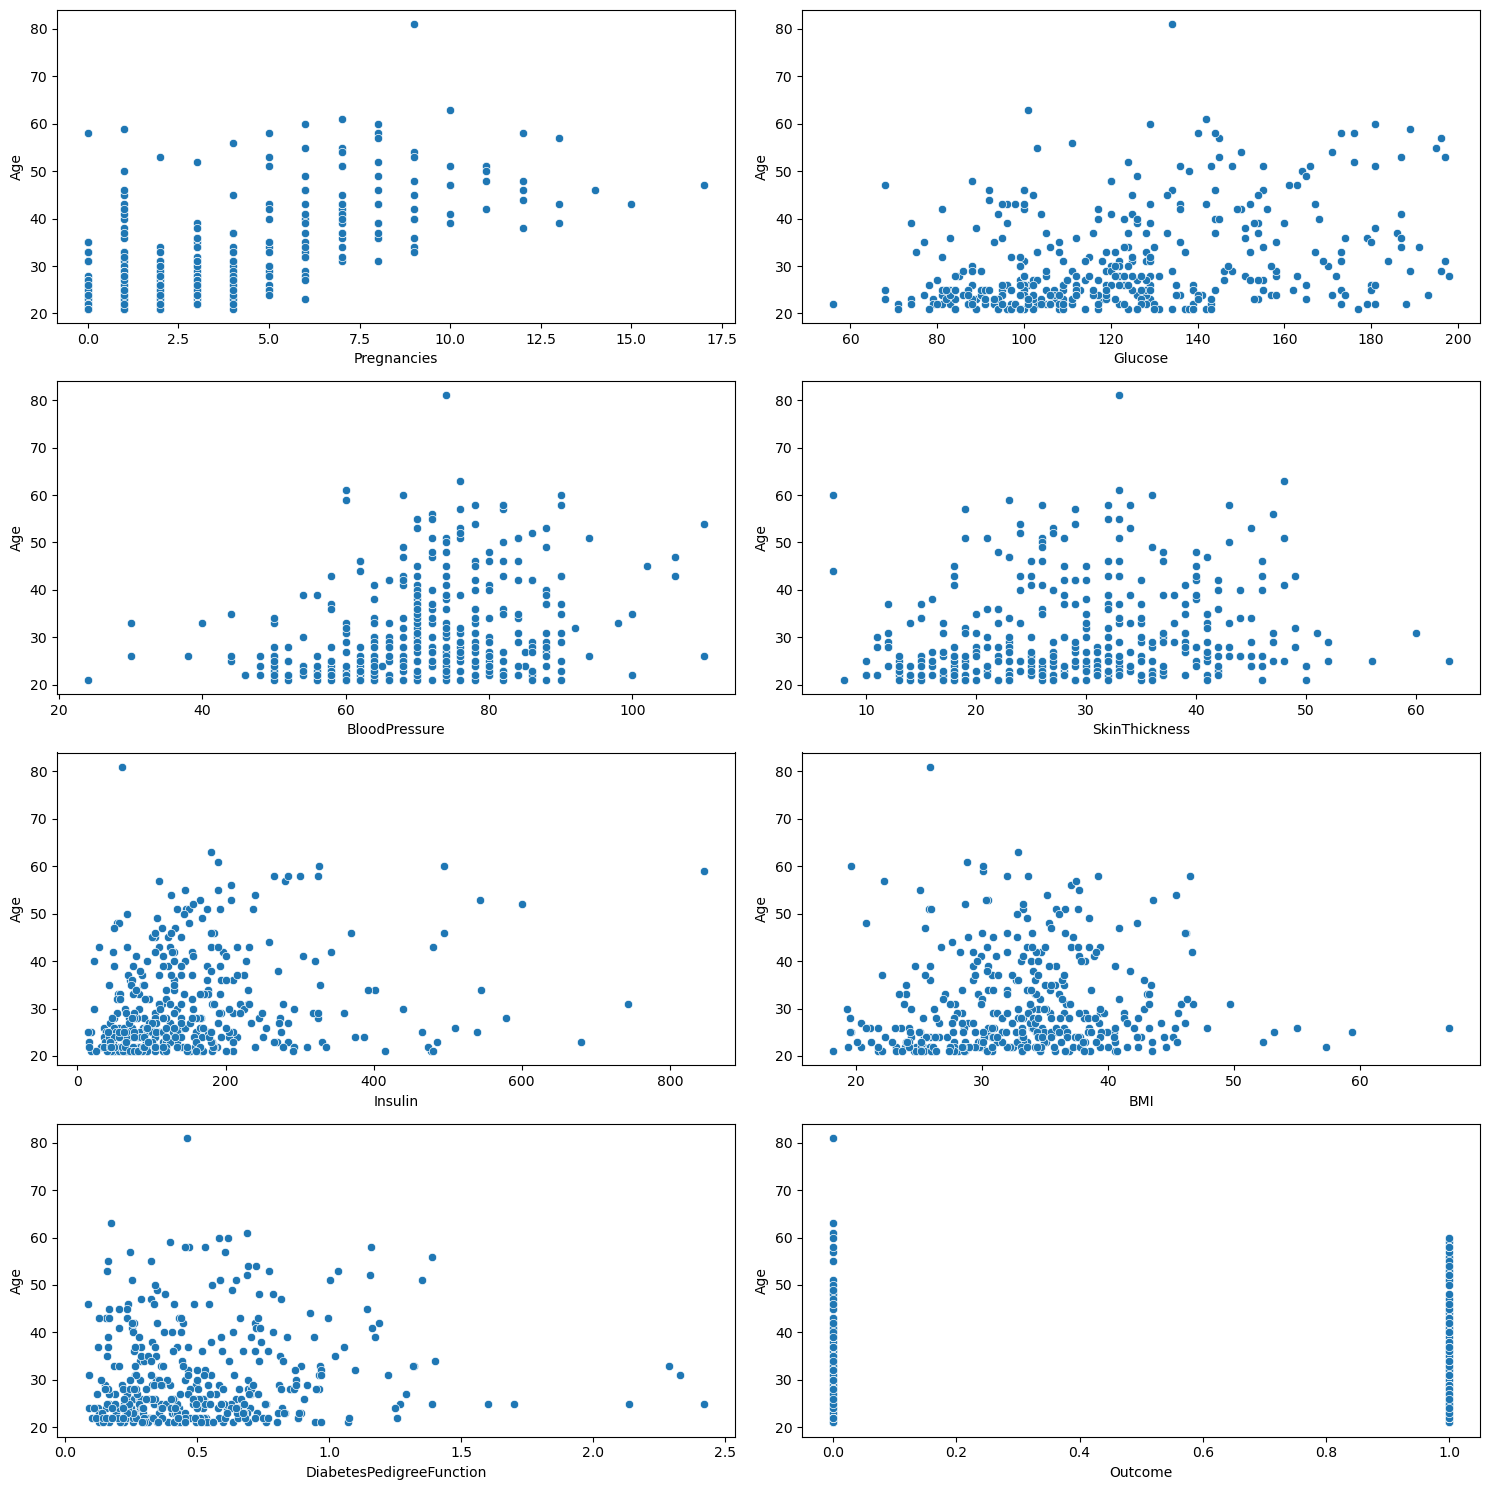

In [171]:
# Features and target
X_feature = diabetes_df.drop("Age", axis=1)
y_target = diabetes_df["Age"]

#Scatterplots to see correlation between Age (target) and features
figure, axs = plt.subplots(4, 2, figsize=(15,15))
axs = axs.flatten()
for i, col in enumerate(X_feature.columns):
    sns.scatterplot(x=X_feature[col], y=y_target, ax=axs[i])
    
# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

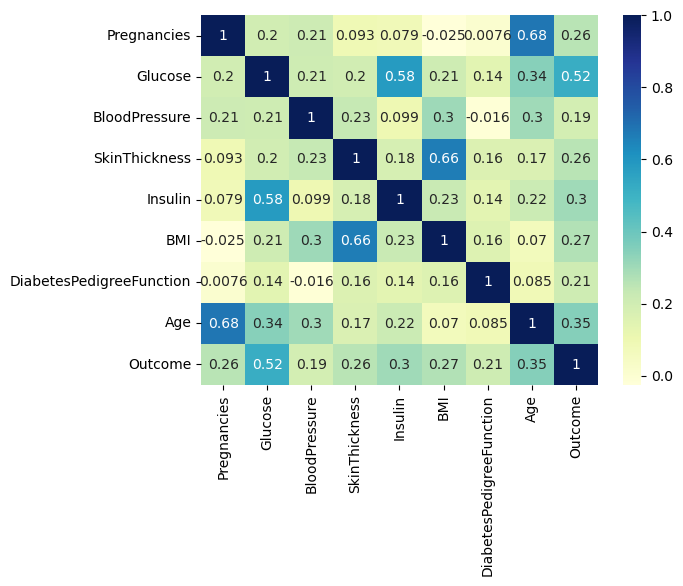

In [172]:
# Draw the heatmap
sns.heatmap(diabetes_df.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [173]:
# Updating Feature matrix by dropping SkinThickness, BMI, DiabetesPedigreeFunction
X_feature = X_feature.drop(["SkinThickness", "BMI", "DiabetesPedigreeFunction"], axis=1)

## Generate training and test sets

In [174]:
# Split data into training and test sets
rseed = 23
X_train, X_test, y_train, y_test = train_test_split(X_feature, y_target, test_size = 0.2,  random_state=rseed)

# Pint Training and Test data shapes
print("Training data:", X_train.shape, y_train.shape)
print("Test data:", X_test.shape, y_test.shape)

Training data: (313, 5) (313,)
Test data: (79, 5) (79,)


## Analyse the types of features in this data set

<function matplotlib.pyplot.show(close=None, block=None)>

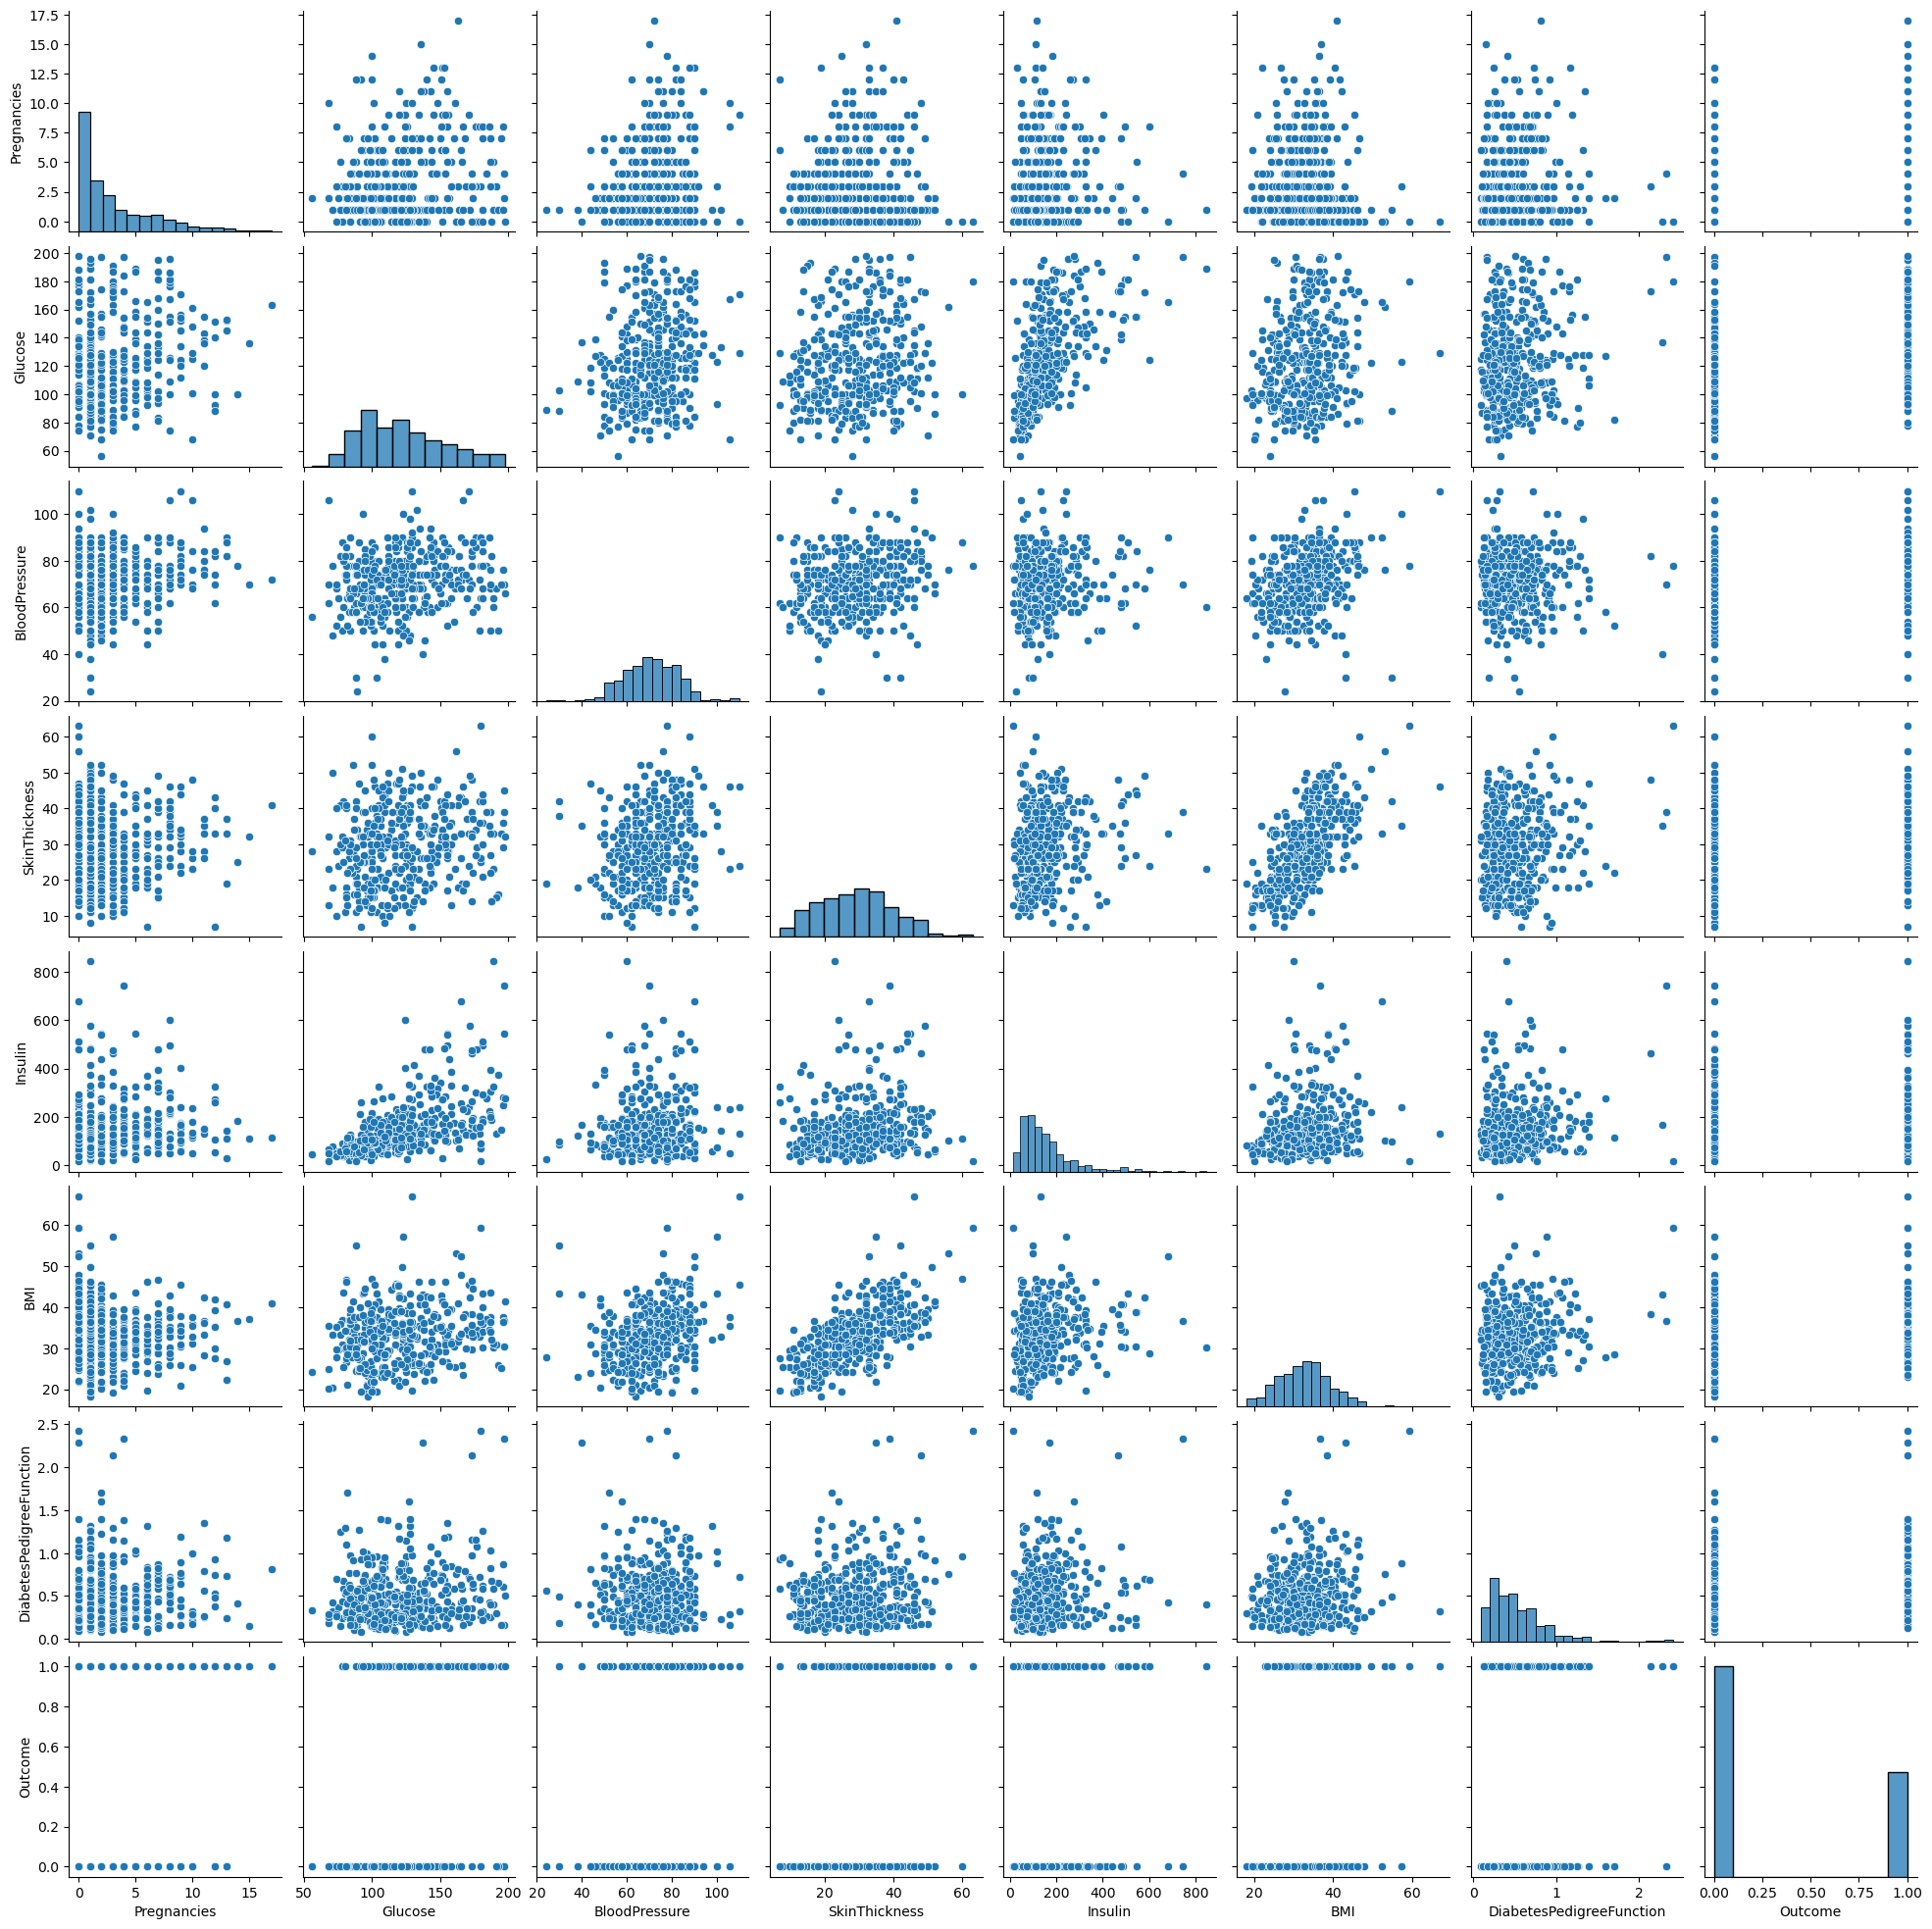

In [175]:
# Plot the distribution of the data
sns.pairplot(data=diabetes_df.drop("Age", axis=1))
plt.show

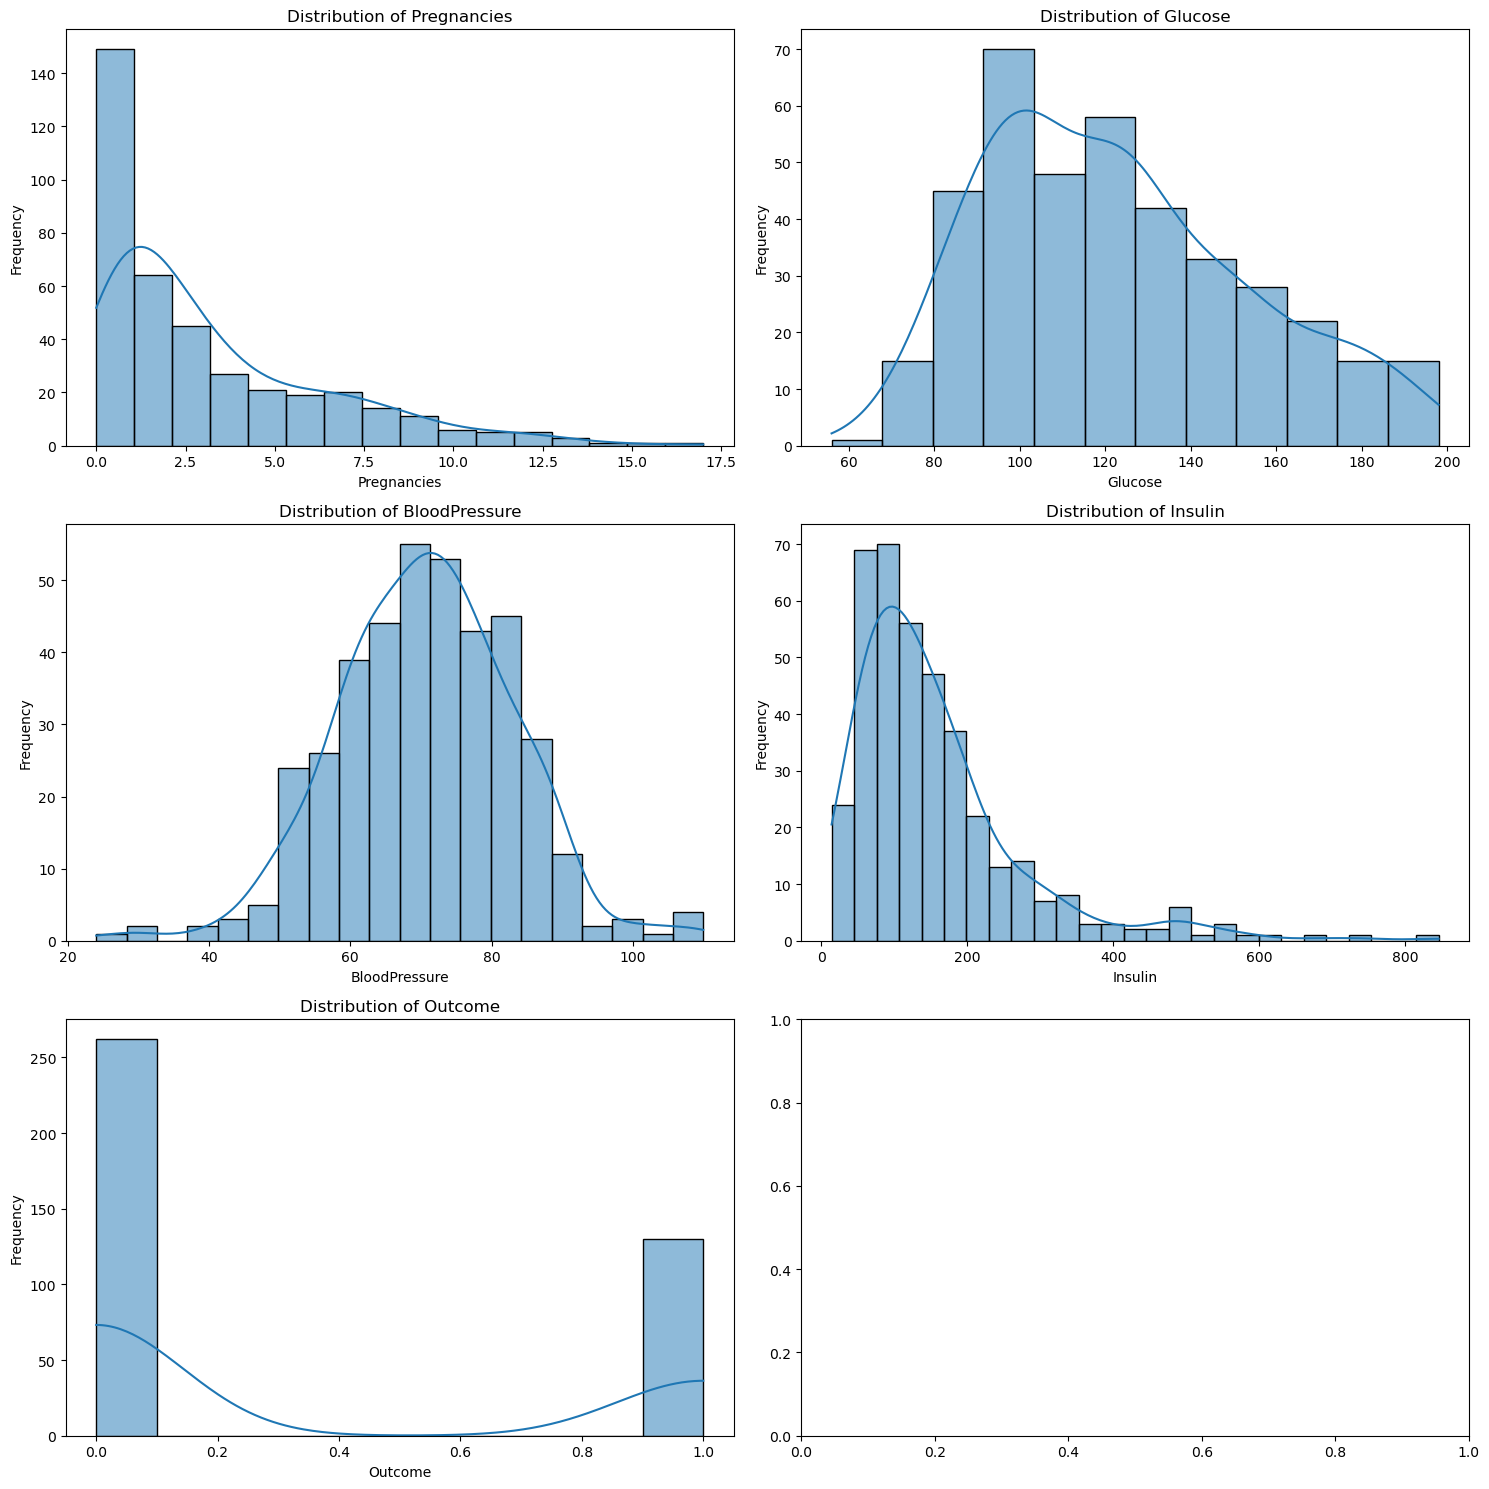

In [176]:
# Plot histogram distribution of features
figure, axs = plt.subplots(3, 2, figsize=(15,15))
axs = axs.flatten()
for i, col in enumerate(X_feature.columns):
    sns.histplot(x=X_feature[col], kde=True, ax=axs[i])
    axs[i].set_title(f"Distribution of {col}")
    axs[i].set_xlabel(col)
    axs[i].set_ylabel("Frequency")

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

In [177]:
# Fit the scaler on train data
scaler_standard = StandardScaler()
scaler_normal = MinMaxScaler()

# Fit and transform the train data
continuous_features = ["Glucose", "BloodPressure", "Insulin"]
categorical_features = ["Pregnancies", "Outcome"]
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[continuous_features] = scaler_standard.fit_transform(X_train[continuous_features])
X_train_scaled[categorical_features] = scaler_normal.fit_transform(X_train[categorical_features])

# Transform the text data
X_test_scaled[continuous_features] = scaler_standard.transform(X_test[continuous_features])
X_test_scaled[categorical_features] = scaler_normal.transform(X_test[categorical_features])


## Generate a multiple linear regression model

In [178]:
# Fit a model
diabete_model = LinearRegression()
model = diabete_model.fit(X_train_scaled, y_train)
y_pred = diabete_model.predict(X_test_scaled)


## Print out the intercept and coefficients of the trained model.

In [179]:
# Print Intercept and Coefficients
print("Intercept: ", diabete_model.intercept_)
print("Coefficients: ", diabete_model.coef_)

# R squared score
score = diabete_model.score(X_test_scaled, y_test)
print (f"R2 Score: {score}")

Intercept:  24.219564153163425
Coefficients:  [31.51751578  1.29487204  1.06241553  0.60523139  2.00982898]
R2 Score: 0.5756310672864744


## Visualization the errors

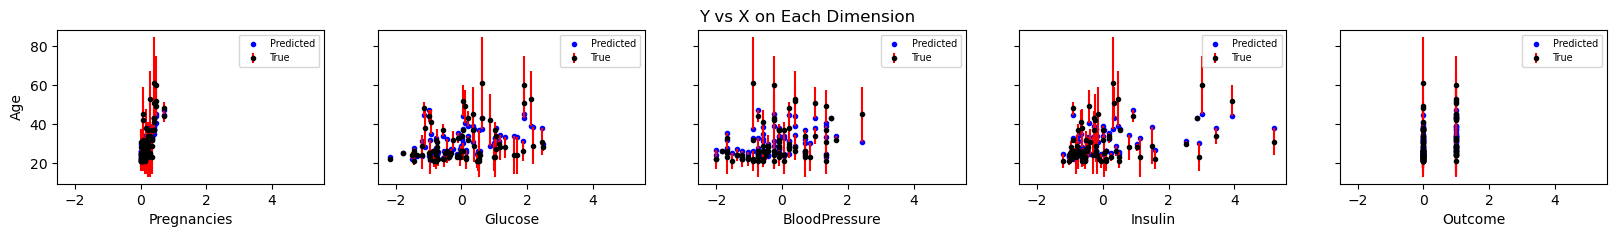

In [180]:
## Plot the errors
fig, ax = plt.subplots(1, X_test_scaled.shape[1], sharey=True, sharex=True, figsize=(20,2))
fig.suptitle("Y vs X on Each Dimension")
ax[0].set_ylabel(diabetes_df.columns[-2])

# Get values for the error bar
error_bar_values = np.abs((y_test-y_pred))

# Plot data, predicted values, and error bars
for i in range(X_test_scaled.shape[1]):
    ax[i].errorbar(X_test_scaled.iloc[:,i], y_test, yerr=error_bar_values, fmt='.k', ecolor='red', label='True')
    ax[i].scatter(X_test_scaled.iloc[:,i], y_pred, c='b', marker='.', label='Predicted')
    ax[i].set_xlabel(X_feature.columns[i])
    ax[i].legend(loc='best', fontsize='x-small')

The red lines indicate the error of the prediction from the actual observations. The black dots represent true values, and the blue dots represent predicted values. You will notice that, at the end of the red lines, either at the top or bottom, is a blue dot. In other words, you can read the red error line as the distance deviated from the true values. The reason why there is a red line either side of the black dot is to show that the error may be within that line, either above or below.

## Compute R-squared

In [181]:
# Calculate the performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print the performance metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 39.310529741741526
R-squared: 0.5756310672864744
Mean Absolute Error: 4.662573881309072


This score is not close to 1, which mean that our Linear Regression model may not fit our observations quite well.